In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
count = 0
balance = 0
age = 0
score = 0
point = 0
salary = 0
tenure = 0
satisfaction_score = 0

for i in range(10000):
    if df["Exited"][i] == 1:
        count += 1
        balance += df["Balance"][i]
        age += df["Age"][i]
        score += df["CreditScore"][i]
        point += df["Point Earned"][i]
        salary += df["EstimatedSalary"][i]
        tenure += df["Tenure"][i]
        sastification_score = df["Satisfaction Score"][i]
print(count)
print("avg balance:", balance/count)
print("avg age:", age/count)
print("avg score:", score/count)
print("avg point:", point/count)
print("avg salary:", salary/count)
print("Tenure:", tenure/count)
print("avg salary:", salary/count)
print("satisfaction score:", satisfaction_score/count)

2038
avg balance: 91109.47600588808
avg age: 44.83562315996075
avg score: 645.4146221786065
avg point: 604.4484789008832
avg salary: 101509.90878312073
Tenure: 4.934739941118744
avg salary: 101509.90878312073
satisfaction score: 0.0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
df_numerical = df[["CreditScore", "NumOfProducts", "Balance", "Age", "Point Earned", "EstimatedSalary", "Tenure", "Satisfaction Score", "Exited"]]
df_numerical.head()

,CreditScore,NumOfProducts,Balance,Age,Point Earned,EstimatedSalary,Tenure,Satisfaction Score,Exited
0,619,1,0.00,42,464,101348.88,2,2,1
1,608,1,83807.86,41,456,112542.58,1,3,0
2,502,3,159660.80,42,377,113931.57,8,3,1
3,699,2,0.00,39,350,93826.63,1,5,0
4,850,1,125510.82,43,425,79084.10,2,5,0


<AxesSubplot:>

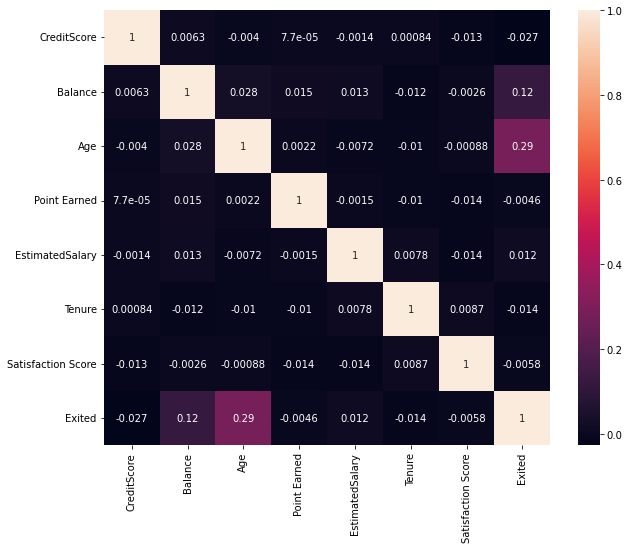

In [7]:
plt.figure(figsize = (10,8))
sn.heatmap(df_numerical.iloc[:, 0:8].corr(), annot = True)

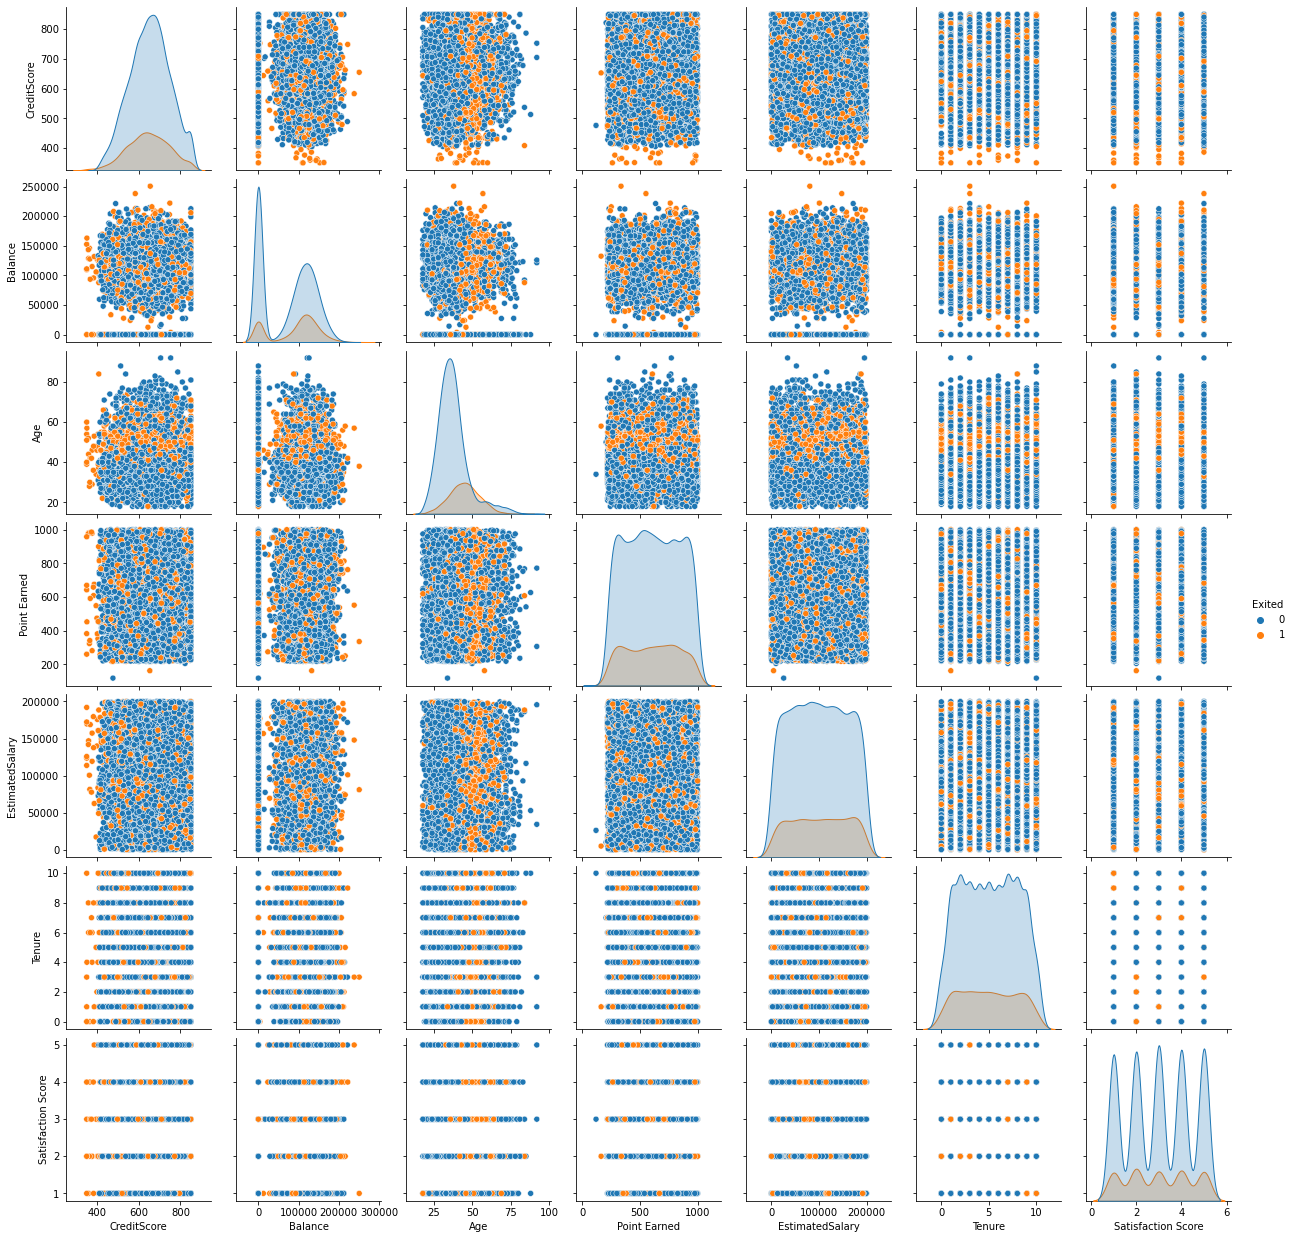

In [22]:
sn.pairplot(data = df_numerical, hue = "Exited")

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

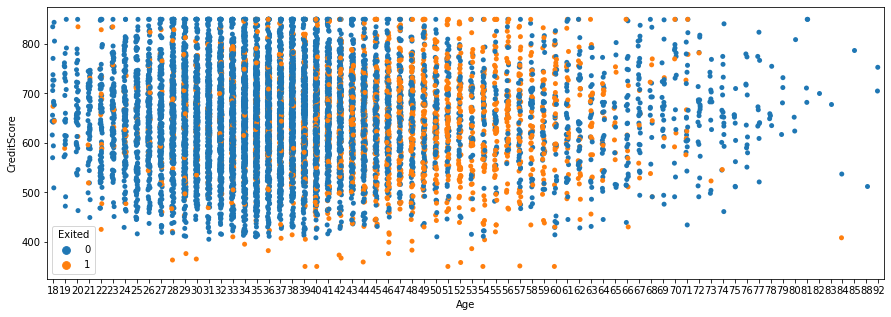

In [32]:
plt.figure(figsize = (15, 5))
sns.stripplot(x = df_numerical["Age"], y = df_numerical["CreditScore"], hue = df_numerical["Exited"])

<AxesSubplot:xlabel='Geography', ylabel='Age'>

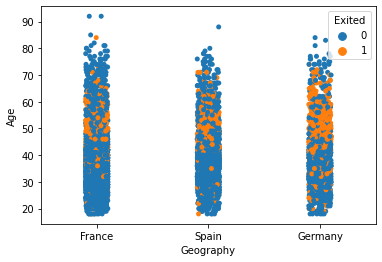

In [42]:
sn.stripplot(x = df["Geography"], y = df["Age"], hue = df["Exited"])

In [45]:
count = df[(df["Geography"] == "Germany") & (df["Exited"] == 1)].shape[0]
print(count)
count2 = df[(df["Geography"] == "France") & (df["Exited"] == 1)].shape[0]
print(count2)

814
811


In [4]:
print(df[df["Balance"] == 0].shape[0])
print(df[(df["Balance"] == 0) & (df["Exited"] == 1)].shape[0])

3617
500


In [5]:
print(df[df["Complain"] == 1].shape[0])
print(df[(df["Complain"] == 1) & (df["Exited"] == 1)].shape[0])

2044
2034


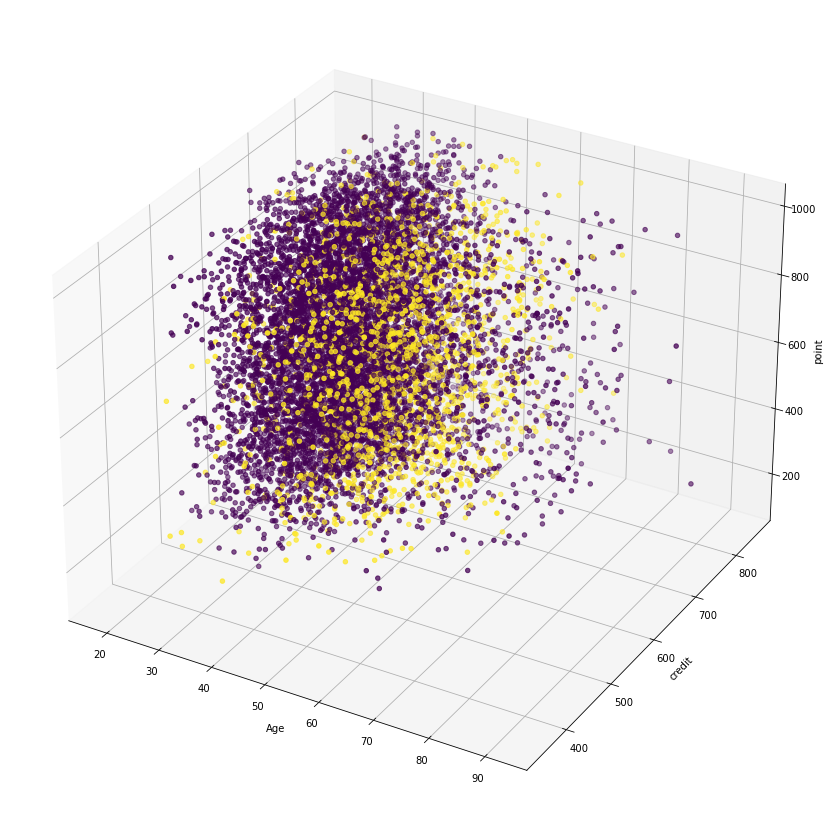

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random data
np.random.seed(42)
x = df_numerical["Age"]
y = df_numerical["CreditScore"]
z = df_numerical["Point Earned"]

# Create the 3D plot
fig = plt.figure(figsize = (15, 15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = df_numerical["Exited"])

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel("credit")
ax.set_zlabel("point")
# ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


In [6]:
df_numerical.head()

,CreditScore,NumOfProducts,Balance,Age,Point Earned,EstimatedSalary,Tenure,Satisfaction Score,Exited
0,619,1,0.00,42,464,101348.88,2,2,1
1,608,1,83807.86,41,456,112542.58,1,3,0
2,502,3,159660.80,42,377,113931.57,8,3,1
3,699,2,0.00,39,350,93826.63,1,5,0
4,850,1,125510.82,43,425,79084.10,2,5,0


In [7]:
df_numerical_x = df_numerical.drop("Exited", axis = 1)
df_numerical_x.head()

,CreditScore,NumOfProducts,Balance,Age,Point Earned,EstimatedSalary,Tenure,Satisfaction Score
0,619,1,0.00,42,464,101348.88,2,2
1,608,1,83807.86,41,456,112542.58,1,3
2,502,3,159660.80,42,377,113931.57,8,3
3,699,2,0.00,39,350,93826.63,1,5
4,850,1,125510.82,43,425,79084.10,2,5


In [8]:
df_numerical.describe()

,CreditScore,NumOfProducts,Balance,Age,Point Earned,EstimatedSalary,Tenure,Satisfaction Score,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.530200,76485.889288,38.921800,606.515100,100090.239881,5.012800,3.013800,0.203800
std,96.653299,0.581654,62397.405202,10.487806,225.924839,57510.492818,2.892174,1.405919,0.402842
min,350.000000,1.000000,0.000000,18.000000,119.000000,11.580000,0.000000,1.000000,0.000000
25%,584.000000,1.000000,0.000000,32.000000,410.000000,51002.110000,3.000000,2.000000,0.000000
50%,652.000000,1.000000,97198.540000,37.000000,605.000000,100193.915000,5.000000,3.000000,0.000000
75%,718.000000,2.000000,127644.240000,44.000000,801.000000,149388.247500,7.000000,4.000000,0.000000
max,850.000000,4.000000,250898.090000,92.000000,1000.000000,199992.480000,10.000000,5.000000,1.000000


In [9]:
df_numerical_x = (df_numerical_x - df_numerical_x.min())/(df_numerical_x.max() - df_numerical_x.min())
# df_numerical_x = (df_numerical_x - df_numerical_x.mean())/(df_numerical_x.std())
df_numerical_x.head()

,CreditScore,NumOfProducts,Balance,Age,Point Earned,EstimatedSalary,Tenure,Satisfaction Score
0,0.538,0.000000,0.000000,0.324324,0.391600,0.506735,0.2,0.25
1,0.516,0.000000,0.334031,0.310811,0.382520,0.562709,0.1,0.50
2,0.304,0.666667,0.636357,0.324324,0.292849,0.569654,0.8,0.50
3,0.698,0.333333,0.000000,0.283784,0.262202,0.469120,0.1,1.00
4,1.000,0.000000,0.500246,0.337838,0.347333,0.395400,0.2,1.00


In [10]:
df_numerical_y = df_numerical['Exited']
df_numerical_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
x = np.array(df_numerical_x)
x.shape

(10000, 8)

In [12]:
y = np.array(df_numerical_y)
y.shape

(10000,)

In [13]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


In [14]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, input_shape = (8,), activation = 'relu'),
#     keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(32, activation = 'relu'),
#     keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.1),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 layer_normalization (LayerN  (None, 32)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 layer_normalization_1 (Laye  (None, 32)               64        
 rNormalization)                                        

In [15]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 32, verbose = 2)

Epoch 1/30
250/250 - 3s - loss: 0.4977 - accuracy: 0.7904 - val_loss: 0.4938 - val_accuracy: 0.7825 - 3s/epoch - 12ms/step
Epoch 2/30
250/250 - 1s - loss: 0.4663 - accuracy: 0.7987 - val_loss: 0.4568 - val_accuracy: 0.7910 - 808ms/epoch - 3ms/step
Epoch 3/30
250/250 - 1s - loss: 0.4369 - accuracy: 0.8037 - val_loss: 0.4294 - val_accuracy: 0.8010 - 668ms/epoch - 3ms/step
Epoch 4/30
250/250 - 1s - loss: 0.4160 - accuracy: 0.8124 - val_loss: 0.4197 - val_accuracy: 0.8055 - 570ms/epoch - 2ms/step
Epoch 5/30
250/250 - 1s - loss: 0.4051 - accuracy: 0.8186 - val_loss: 0.4207 - val_accuracy: 0.8090 - 622ms/epoch - 2ms/step
Epoch 6/30
250/250 - 1s - loss: 0.4023 - accuracy: 0.8184 - val_loss: 0.4162 - val_accuracy: 0.8060 - 670ms/epoch - 3ms/step
Epoch 7/30
250/250 - 1s - loss: 0.3937 - accuracy: 0.8223 - val_loss: 0.4165 - val_accuracy: 0.8080 - 654ms/epoch - 3ms/step
Epoch 8/30
250/250 - 1s - loss: 0.3936 - accuracy: 0.8205 - val_loss: 0.4147 - val_accuracy: 0.8070 - 979ms/epoch - 4ms/step
Ep

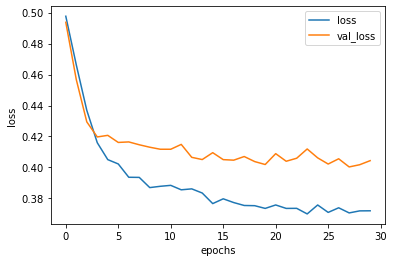

In [16]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

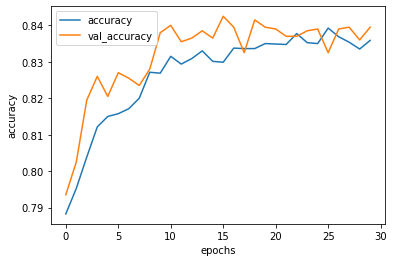

In [30]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
threshold = 0.5  # Adjust the threshold as per your requirements
y_pred = (y_pred >= threshold).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

63/63 [==============================] - 0s 2ms/step
Precision: 0.6821705426356589
Recall: 0.4045977011494253
F1-score: 0.5079365079365079


In [ ]:
# from tensorflow import keras

# model = keras.Sequential([
#     keras.layers.Dense(32, input_shape = (7,), activation = 'relu'),
#     keras.layers.Dense(64, activation = 'relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.LayerNormalization(),
#     keras.layers.Dense(32, activation = 'relu'),
#     keras.layers.Dense(64, activation = 'relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.LayerNormalization(),
#     keras.layers.Dense(32, activation = 'relu'),
#     keras.layers.Dense(1, activation = 'sigmoid')
# ])

# model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
# model.summary()

In [28]:
# from tensorflow import keras

# class Model(keras.Model):
#     def __init__(self, input_dim, layer_dim, output_dim):
#         super(Model, self).__init__()
#         self.input_layer = keras.layers.InputLayer(input_shape = input_dim)
#         self.ff1 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
#         self.norm1 = keras.layers.LayerNormalization()
#         self.ff2 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
#         self.norm2 = keras.layers.LayerNormalization()
#         self.drop = keras.layers.Dropout(0.2)
#         self.ff3 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
#         self.norm3 = keras.layers.LayerNormalization()
#         self.ff4 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
#         self.norm4 = keras.layers.LayerNormalization()
#         self.output_layer = keras.layers.Dense(output_dim, activation = 'sigmoid')
#     def call(self, inputs):
#         out = self.input_layer(inputs)
#         out = self.ff1(inputs)
#         out = self.norm1(out)
#         out = self.ff2(out)
#         out = self.norm2(out)
#         out = self.drop(out)
#         out = self.ff3(out)
#         out = self.norm3(out)
#         out = self.ff4(out)
#         out = self.norm4(out)
#         out = self.output_layer(out)
#         return out
    
# model = Model((7,), 128, 1)

# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# inputs = x_train

# outputs = model(inputs)
# model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# def generate_random_batches(data, batch_size):
#     # Shuffle the data and the corresponding numerical order
#     indices = np.random.permutation(len(data))
#     shuffled_data = data[indices]
#     shuffled_numerical_order = np.arange(len(data))[indices]

#     # Reshape the shuffled data into batches
#     num_batches = len(data) // batch_size
# #     batches = np.reshape(shuffled_data[:num_batches*batch_size], (num_batches, batch_size))
#     batches = np.reshape(shuffled_data, (num_batches, batch_size, -1))

#     # Reshape the shuffled numerical order into corresponding batches
#     numerical_order_batches = np.reshape(shuffled_numerical_order, (num_batches, batch_size))

#     return batches, numerical_order_batches


# # def Loss(count, numerical_order_batch, outputs):
# #     losses = []
# #     for output, order in zip(outputs, numerical_order_batch):
# #       distances = [tf.norm(output - predictions[i], axis=0) for i in range(5*order, 5*order+5) ]
# #       sum_distances = tf.reduce_sum(distances)
# #       loss1 = sum_distances
# #       loss2 = tf.norm(output - df_scaled.loc[order, "cluster"], axis=0)
# #       loss = 0.3*loss1 + 0.7*loss2
# #       losses.append(loss)
# #     return tf.reduce_sum(losses)/len(numerical_order_batch)

# model = Model((7,), 64, 1)
# optimizer = keras.optimizers.Adam()
# Loss = keras.losses.BinaryCrossentropy()
# model.compile(optimizer=optimizer, loss = Loss)

# train_batches, numerical_order_batches = generate_random_batches(dataset, batch_size=200)
# num_epochs = 20
# # train_batches.shape
# for epoch in range(num_epochs):
#     count = 0
#     epoch_loss = []
#     for batch, numerical_order_batch in zip(train_batches, numerical_order_batches):
#         with tf.GradientTape() as tape:
#             # Forward pass
#             outputs = model.call(batch)

#             # Calculate the loss
# #             loss = Loss(count, numerical_order_batch, outputs)
#             loss = Loss
#             epoch_loss.append(loss.numpy())
#         # Calculate gradients and update weights
#         gradients = tape.gradient(loss, model.trainable_variables)
#         optimizer.apply_gradients(zip(gradients, model.trainable_variables))
#         count += 1
#         print(f"Batch [{count}], Loss: {loss.numpy()}")
#     # Print or log the loss for monitoring
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {sum(epoch_loss)/len(numerical_order_batch)}")

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_46 (Dense)            multiple                  1024      
                                                                 
 layer_normalization_35 (Lay  multiple                 256       
 erNormalization)                                                
                                                                 
 dense_47 (Dense)            multiple                  16512     
                                                                 
 layer_normalization_36 (Lay  multiple                 256       
 erNormalization)                                                
                                                                 
 dropout_1 (Dropout)         multiple                  0  

In [29]:
# history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, batch_size = 256, verbose = 2)

Epoch 1/50
32/32 - 3s - loss: 0.5067 - accuracy: 0.7818 - val_loss: 0.4661 - val_accuracy: 0.7805 - 3s/epoch - 82ms/step
Epoch 2/50
32/32 - 0s - loss: 0.4651 - accuracy: 0.7922 - val_loss: 0.4617 - val_accuracy: 0.7810 - 354ms/epoch - 11ms/step
Epoch 3/50
32/32 - 0s - loss: 0.4601 - accuracy: 0.7933 - val_loss: 0.4641 - val_accuracy: 0.7910 - 344ms/epoch - 11ms/step
Epoch 4/50
32/32 - 0s - loss: 0.4565 - accuracy: 0.7950 - val_loss: 0.4571 - val_accuracy: 0.7855 - 330ms/epoch - 10ms/step
Epoch 5/50
32/32 - 0s - loss: 0.4521 - accuracy: 0.7962 - val_loss: 0.4503 - val_accuracy: 0.7905 - 325ms/epoch - 10ms/step
Epoch 6/50
32/32 - 0s - loss: 0.4448 - accuracy: 0.7974 - val_loss: 0.4517 - val_accuracy: 0.7900 - 353ms/epoch - 11ms/step
Epoch 7/50
32/32 - 0s - loss: 0.4408 - accuracy: 0.8014 - val_loss: 0.4417 - val_accuracy: 0.8015 - 366ms/epoch - 11ms/step
Epoch 8/50
32/32 - 0s - loss: 0.4402 - accuracy: 0.8029 - val_loss: 0.4380 - val_accuracy: 0.8055 - 359ms/epoch - 11ms/step
Epoch 9/50
